In [1]:
%%html
<link rel="stylesheet" type="text/css" href="rise.css" />

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [9, 5]

# Classification
**Learning goals**
- You will be able to apply a logistic regression binary classifier.
- You will be able to use your classifer to predict the class.
- You will be able to compute the accuracy of your classifier.
- You will be able to use your classifer to get the probability of each possible class.
- You will be able to compute, display, and interpret confusion matrices.
- You will be able to classify date into more than two classes.

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [3]:
import pandas as pd
df = pd.read_csv('data/Data_Cortex_Nuclear.csv')
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Goal is to use protein expression levels to classify mice. Each mouse in the dataset belongs to one of the following eight classes:

1. c-CS-s: control mice,  stimulated to learn,      injected with saline
2. c-CS-m: control mice,  stimulated to learn,      injected with memantine
3. c-SC-s: control mice,  not stimulated to learn,  injected with saline
4. c-SC-m: control mice,  not stimulated to learn,  injected with memantine
5. t-CS-s: trisomy mice,  stimulated to learn,      injected with saline
6. t-CS-m: trisomy mice,  stimulated to learn,      injected with memantine
7. t-SC-s: trisomy mice,  not stimulated to learn,  injected with saline
8. t-SC-m: trisomy mice,  not stimulated to learn,  injected with memantine

which are combinations of:

* Control vs. down syndrome.
* Did or did not recieve behavioral conditioning.
* Saline vs. memantine injection.

First, throw out features and data points with missing measurements.

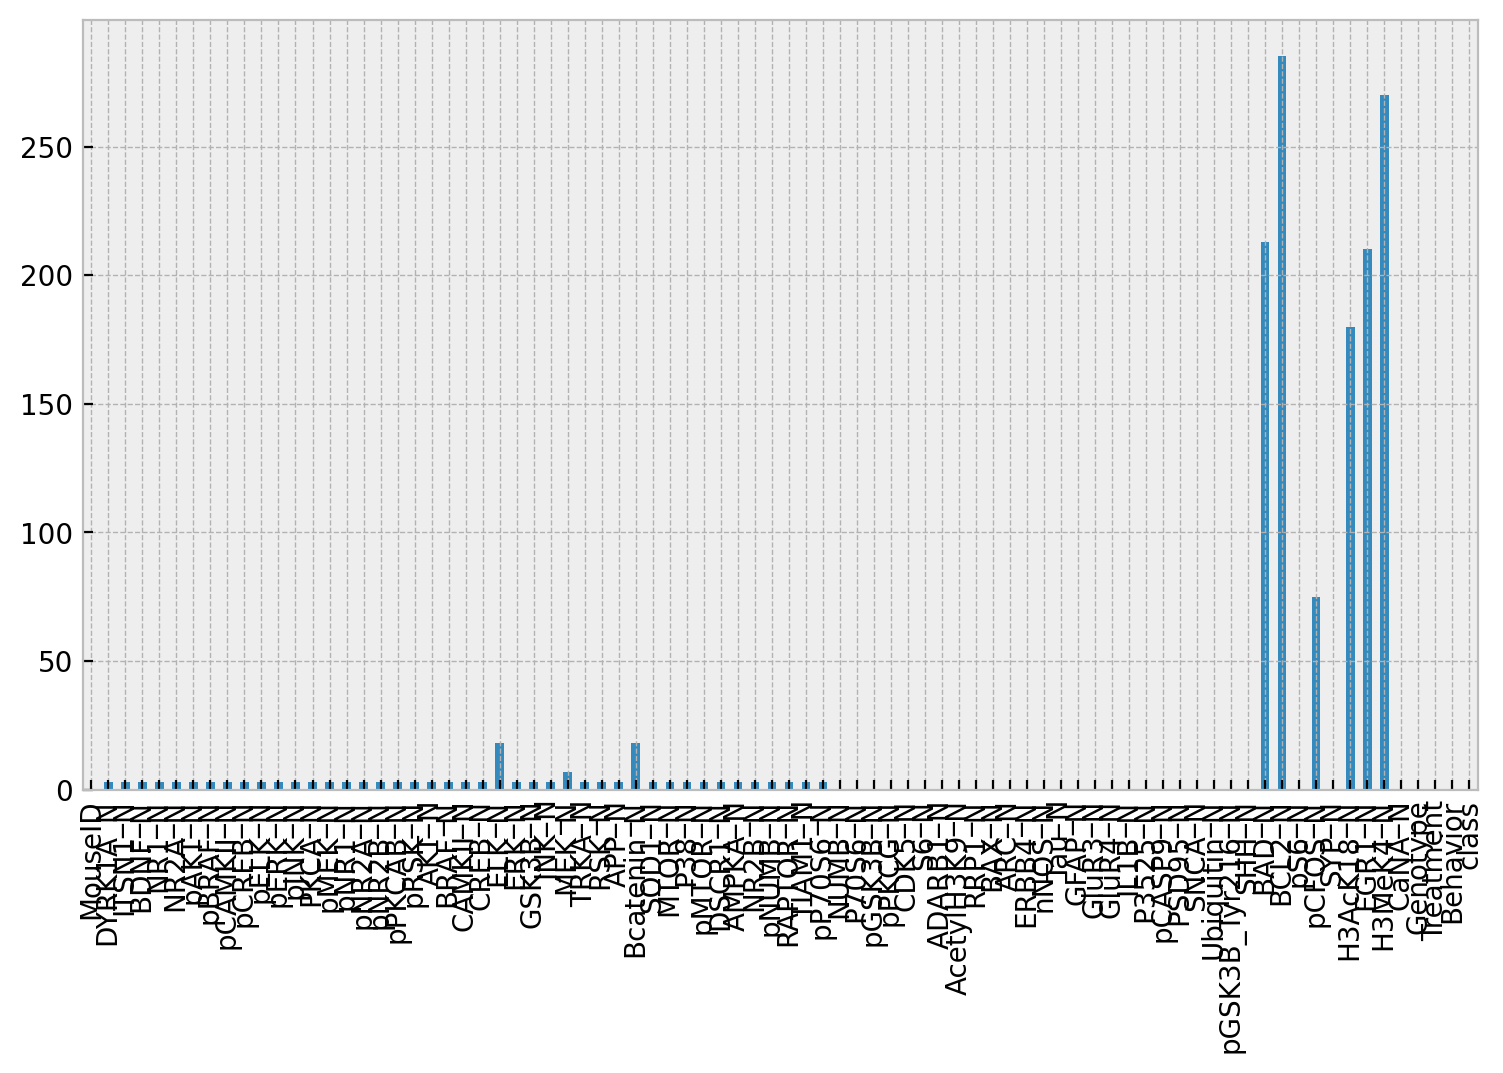

In [4]:
df.isnull().sum().plot.bar();

In [5]:
miss_too_many = df.isnull().sum() > 10

miss_too_many

MouseID      False
DYRK1A_N     False
ITSN1_N      False
BDNF_N       False
NR1_N        False
             ...  
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
class        False
Length: 82, dtype: bool

In [6]:
df2 = df.loc[:, ~miss_too_many]

df.shape, df2.shape

((1080, 82), (1080, 74))

In [7]:
# discard mice with missing measurements
df2 = df2.dropna()

df2.shape

(1073, 74)

The dataset we will use for building a classsification model.

In [8]:
df2

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Can you predict genotype based on protein expression?

What about treatment, behavior or class?

In [9]:
expr = df2.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
genotype = df2['Genotype']
treatment = df2['Treatment']
behavior = df2['Behavior']
mouse_class = df2['class']

expr.shape, genotype.shape, treatment.shape, behavior.shape, mouse_class.shape

((1073, 69), (1073,), (1073,), (1073,), (1073,))

In [10]:
genotype.unique()

array(['Control', 'Ts65Dn'], dtype=object)

The problem with linear regression.

$\hat{y} = \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n$

But $y$ (*Genotype*) will be a continuous variable, whereas it needs to be one of two things: *Control* or *Ts65Dn*.

We could still try to use linear regression and just impose a threshold to do the classification.

![](images/linear-regression-threshold.jpeg)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

But what if we have an outlier in the data?

Non-ideal data could easily lead to misclassification using a linear model.

![](images/linear-regression-threshold-outlier.png)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

A sigmoidal function will better classify categorical data and will be less prone to error due to outliers.

![](images/logistic-regression-classifier.png)

Image from https://towardsdatascience.com/understanding-logistic-regression-9b02c2aec102

### Logistic regression

$\hat{y} = sigmoid \left( \beta_0 + \beta_1 x_1 + \dots + \beta_n x_n \right)$

$y = Bernoilli(\hat{y}) = 
\left\{ \begin{matrix}
0 & Control \\
1 & Ts65Dn \\
\end{matrix} \right\}$

How well can you predict genotype based on protein expression using logistic regression?

In [19]:
X = expr
y = genotype

X.shape, y.shape, y.unique()

((1073, 69), (1073,), array(['Control', 'Ts65Dn'], dtype=object))

Let's shuffle the data as the order of the mice (rows) does not matter.

In [20]:
from sklearn.utils import shuffle

X, y = shuffle(X, y, random_state=1)

In [21]:
from sklearn.linear_model import LogisticRegression

# train model on all data
model = LogisticRegression(max_iter=300)
model.fit(X, y)

# evaluate accuracy on training data
accuracy = model.score(X, y)
accuracy

0.9478098788443616

But evaluating accuracy on the same data used to train the model is liable to give you a false impression of how accurate your model is when it comes to data it was not trained on.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=8)

# train model on training set
model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

# evaluate accuracy on testing set
accuracy = model.score(X_test, y_test)
accuracy

0.9162790697674419

This is a more reliable measure of the model's accuracy.

Compare true vs. predicted genotype for the mice in the test set.

In [23]:
# predict genotype of each mouse in the test set based on protein expression
y_test_pred = model.predict(X_test)

# print table of true vs. predicted genotypes for mice in the test set
results = y_test.to_frame(name='truth')
results["prediction"] = y_test_pred
results

,truth,prediction
144,Control,Control
853,Ts65Dn,Ts65Dn
174,Control,Control
384,Control,Control
616,Ts65Dn,Ts65Dn
...,...,...
563,Control,Control
952,Ts65Dn,Ts65Dn
851,Ts65Dn,Ts65Dn
20,Control,Control


From logistic regression model you can determine not only the predicted genotypes, but the predicted probability of each genotype.

In [24]:
y_test_proba = model.predict_proba(X_test)
y_test_proba.shape

(430, 2)

After training, the model keeps track of all the possible classes.

In [25]:
model.classes_

array(['Control', 'Ts65Dn'], dtype=object)

In [26]:
results[f'P({model.classes_[0]})'] = y_test_proba[:,0]
results[f'P({model.classes_[1]})'] = y_test_proba[:,1]
results

,truth,prediction,P(Control),P(Ts65Dn)
144,Control,Control,0.557180,0.442820
853,Ts65Dn,Ts65Dn,0.253451,0.746549
174,Control,Control,0.787073,0.212927
384,Control,Control,0.822802,0.177198
616,Ts65Dn,Ts65Dn,0.489087,0.510913
...,...,...,...,...
563,Control,Control,0.848680,0.151320
952,Ts65Dn,Ts65Dn,0.096527,0.903473
851,Ts65Dn,Ts65Dn,0.298848,0.701152
20,Control,Control,0.882655,0.117345


Ok, but all of the above was only for one particular way of splitting the data in train/test sets. How much can we expect this to extrapolate to other ways of splitting the data or new data entirely?

And we only got predictions for the test set. Is there any way we can use our entire date set to get predictions and measure accuracy?

What about this? Why or why not?

In [27]:
from sklearn.linear_model import LogisticRegression

# train model on training set
model = LogisticRegression(max_iter=300)
model.fit(X, y)

# evaluate accuracy on testing set
accuracy = model.score(X, y)
accuracy

0.9478098788443616

You should already know that to get a reasonable measure of accuracy that utilizes the entire data set you should use cross validation.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=300)

kf = StratifiedKFold(n_splits=5)

cv = cross_validate(model, X, y, cv=kf, scoring='accuracy')

accuracy = cv['test_score']
accuracy, np.mean(accuracy)

(array([0.91627907, 0.9255814 , 0.93488372, 0.92056075, 0.94859813]),
 0.9291806129102369)

Another way of doing the same thing as above.

In [29]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=300)

accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
accuracy, np.mean(accuracy)

(array([0.91627907, 0.9255814 , 0.93488372, 0.92056075, 0.94859813]),
 0.9291806129102369)

However, you can also use cross validation to get test (validation) set predictions for your entire dataset.

In this way, every prediction is for data in a validation set on which the model was not trained.

![](images/cross_val_predict.png)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(max_iter=300)
kf = StratifiedKFold(n_splits=5)

Xn = X.to_numpy()
yn = y.to_numpy()

y_pred = yn.copy()
y_proba = np.zeros([len(y), 2])

for train_ind, test_ind in kf.split(X, y):
    model.fit(Xn[train_ind], yn[train_ind])
    
    y_pred[test_ind] = model.predict(Xn[test_ind])
    y_proba[test_ind] = model.predict_proba(Xn[test_ind])

yn.shape, y_pred.shape, y_proba.shape

((1073,), (1073,), (1073, 2))

Another way of doing the same thing as above.

In [32]:
from sklearn.model_selection import cross_val_predict

model = LogisticRegression(max_iter=300)

y_pred = cross_val_predict(model, X, y, cv=5)
y_proba = cross_val_predict(model, X, y, cv=5, method='predict_proba')

y.shape, y_pred.shape, y_proba.shape

((1073,), (1073,), (1073, 2))

In [33]:
results = y.to_frame('truth')
results['prediction'] = y_pred
classes = y.unique()
results[f'P({classes[0]})'] = y_proba[:,0]
results[f'P({classes[1]})'] = y_proba[:,1]
results

,truth,prediction,P(Ts65Dn),P(Control)
682,Ts65Dn,Control,0.858882,0.141118
27,Control,Control,0.859019,0.140981
545,Control,Control,0.500595,0.499405
611,Ts65Dn,Ts65Dn,0.364298,0.635702
175,Control,Control,0.797583,0.202417
...,...,...,...,...
851,Ts65Dn,Ts65Dn,0.236209,0.763791
719,Ts65Dn,Ts65Dn,0.121646,0.878354
909,Ts65Dn,Control,0.514210,0.485790
235,Control,Control,0.559465,0.440535


### Confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
cm

array([[529,  37],
       [ 39, 468]])

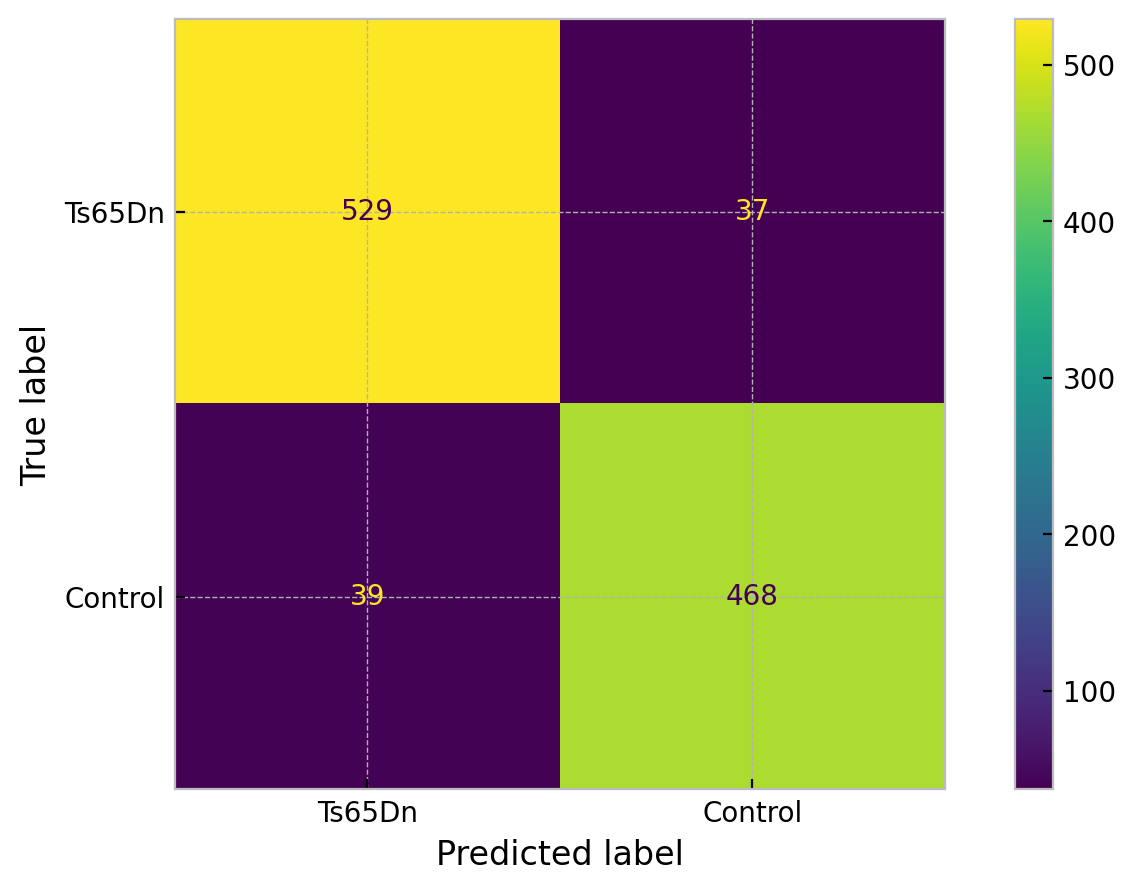

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
cmd.plot();

### Exercise

1. Use logistic regression to predict behavior (C/S vs. S/C) based on protein expression.

    C/S: stimulated to learn
    S/C: not stimulated to learn

2. Generate a confusion matrix and ROC curve to visualize the performance of your classifier.

In [36]:
X, y = shuffle(expr, behavior)

X.shape, y.shape, np.unique(y)

((1073, 69), (1073,), array(['C/S', 'S/C'], dtype=object))

In [ ]:
# # construct a logistic regression model object
# model = LogisticRegression(max_iter=300)

# # Get cross valdiated predictions
# y_pred = ...

# # get cross validated probabilities
# y_proba = ...

# # get a cross validated accuracy
# accuracy = ...
# accuracy

In [ ]:
# # create and display a confusion matrix for the 
# # predicted vs. true behavioral training method of each mouse
# cm = ...

# cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
# cmd.plot();

### Exercise key

1. Use logistic regression to predict behavior (C/S vs. S/C) based on protein expression.

    C/S: stimulated to learn
    S/C: not stimulated to learn

2. Generate a confusion matrix and ROC curve to visualize the performance of your classifier.

In [39]:
X, y = shuffle(expr, behavior)

X.shape, y.shape, np.unique(y)

((1073, 69), (1073,), array(['C/S', 'S/C'], dtype=object))

In [40]:
# construct a logistic regression model object
model = LogisticRegression(max_iter=300)

# Get cross valdiated predictions
y_pred = cross_val_predict(model, X, y, cv=10)

# get cross validated probabilities
y_proba = cross_val_predict(model, X, y, cv=10, method='predict_proba')

# get a cross validated accuracy
accuracy = cross_val_score(model, X, y, cv=10, scoring='accuracy').mean()
accuracy

1.0

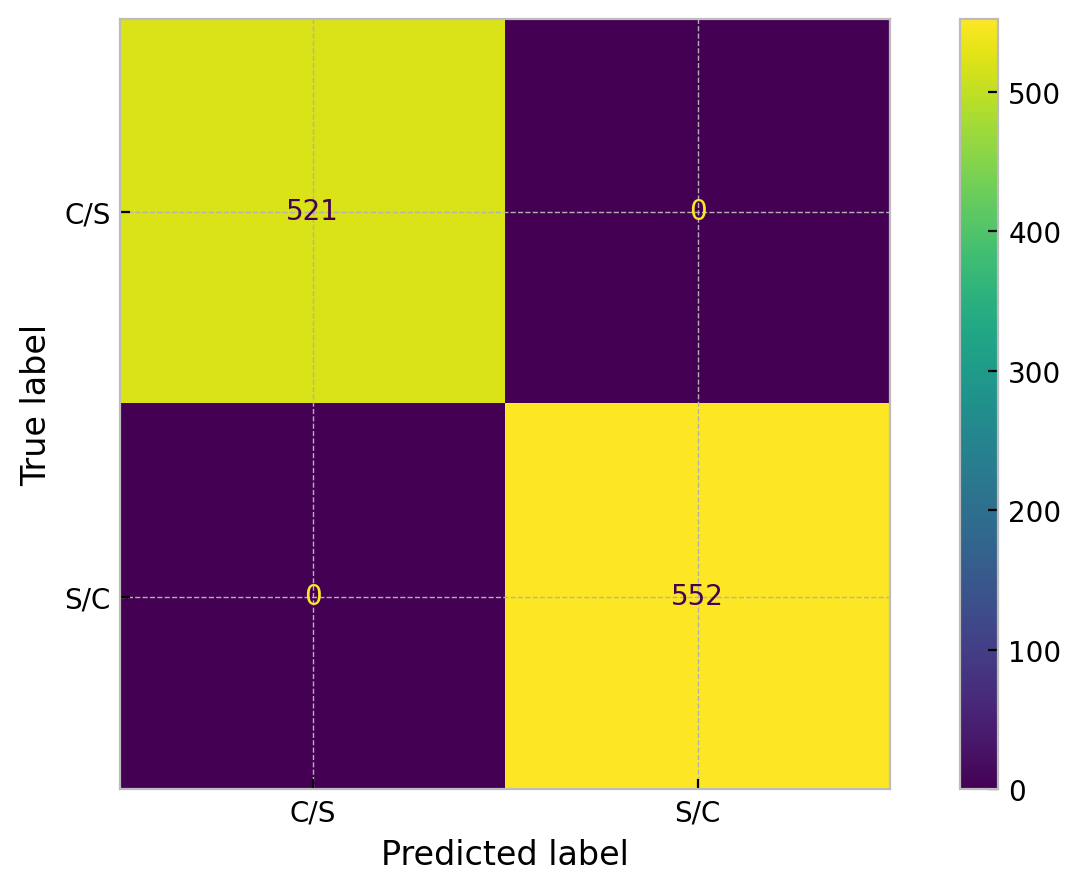

In [41]:
# create and display a confusion matrix for the 
# predicted vs. true behavioral training method of each mouse
cm = confusion_matrix(y, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
cmd.plot();

### Exercise

Write a function that takes as input a classification model, number of cross validation folds, feature data X, and target data y, and displays a confusion matrix based on the true vs. predicted classes across validation sets.

In [42]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# def show_confusion_matrix(model, kfolds, X, y):
#     # shuffle data (just in case it wasn't shuffled before)
#     Xs, ys = ...
#     # get cross validated predictions
#     y_pred = ...
#     # confusion matrix for known y and predictions from validation folds
#     cm = ...
#     # plot confusion matrix
#     cmd = ...
#     cmd.plot();

### Exercise key

Write a function that takes as input a classification model, number of cross validation folds, feature data X, and target data y, and displays a confusion matrix based on the true vs. predicted classes across validation sets.

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils import shuffle

def show_confusion_matrix(model, kfolds, X, y):
    # get cross validated predictions
    kfolds = StratifiedKFold(n_splits=kfolds, shuffle=True, random_state=0)
    y_pred = cross_val_predict(model, X, y, cv=kfolds)
    # confusion matrix for known y and predictions from validation folds
    cm = confusion_matrix(y, y_pred)
    # plot confusion matrix
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
    cmd.plot(xticks_rotation='vertical');

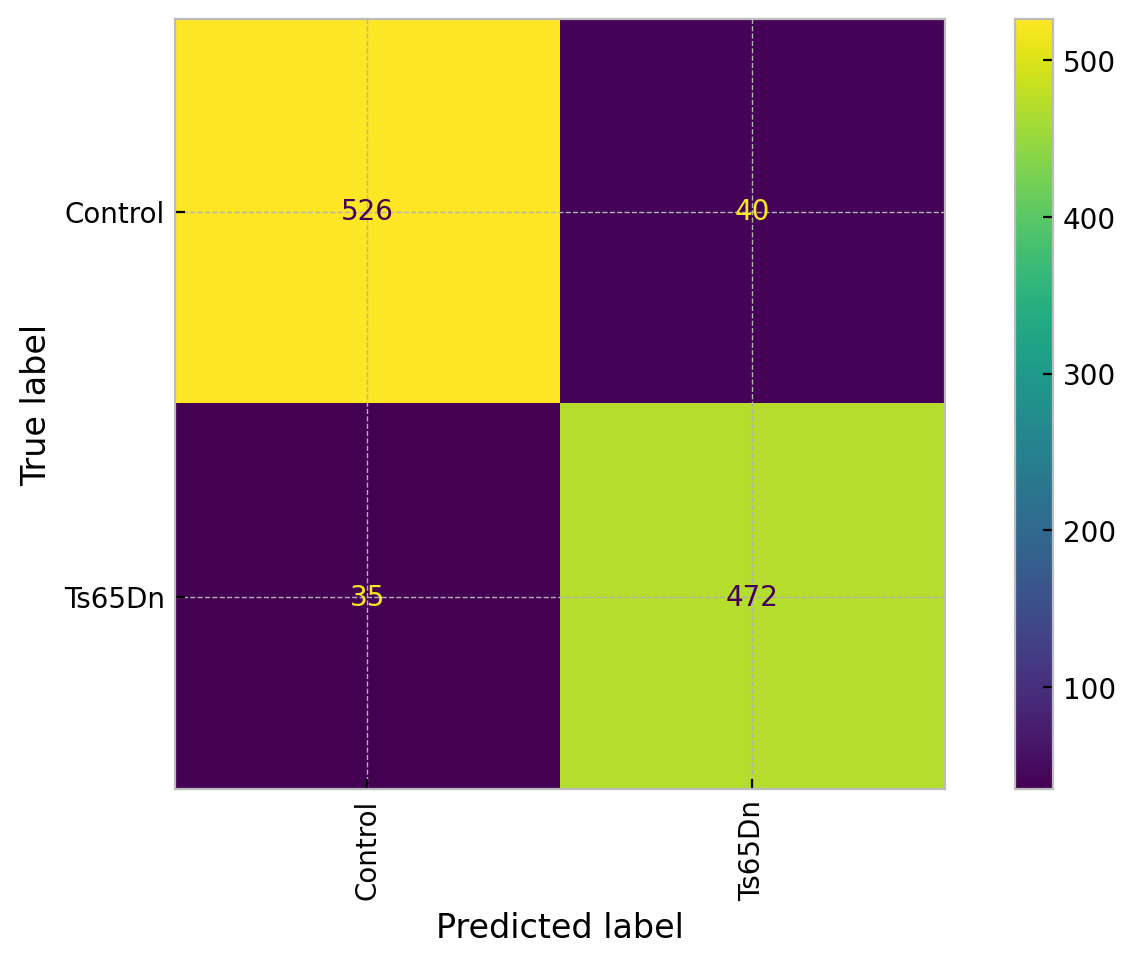

In [44]:
X, y = expr, genotype

model = LogisticRegression(max_iter=300)

show_confusion_matrix(model, 10, X, y);

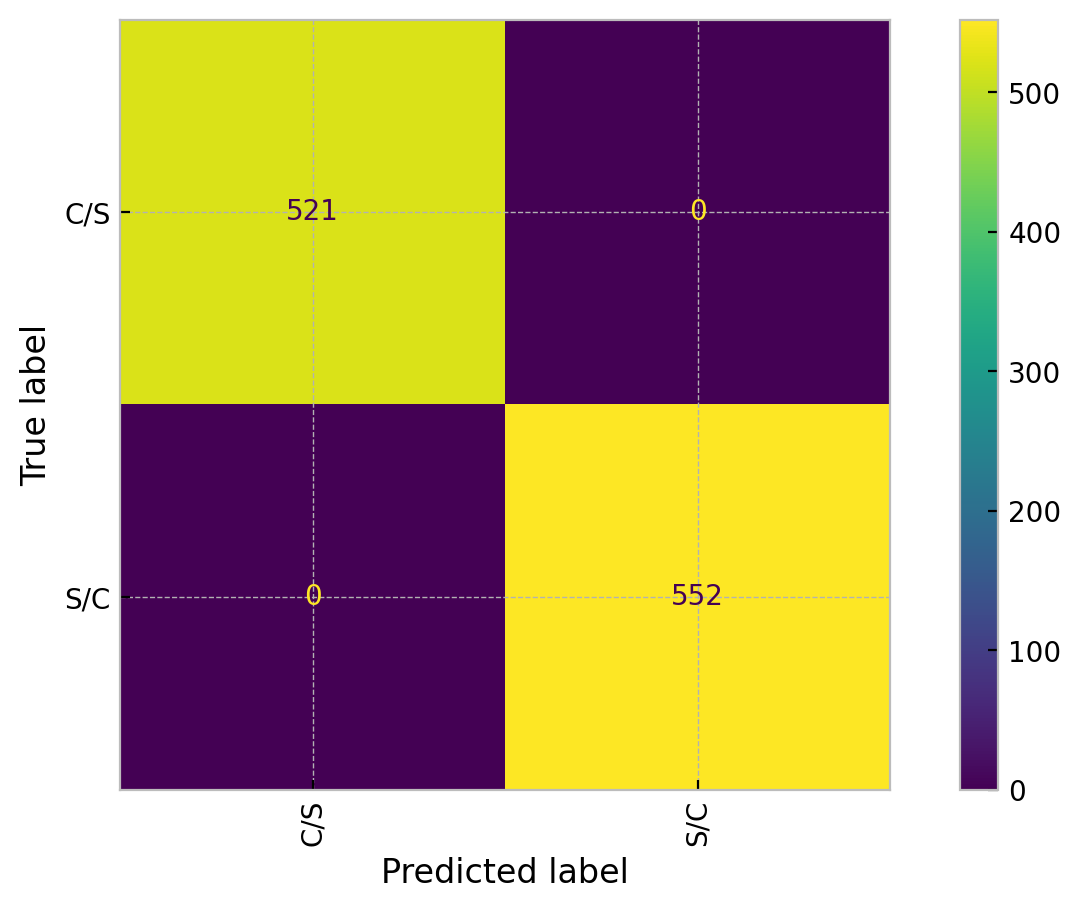

In [45]:
X, y = expr, behavior

model = LogisticRegression(max_iter=300)

show_confusion_matrix(model, 10, X, y)

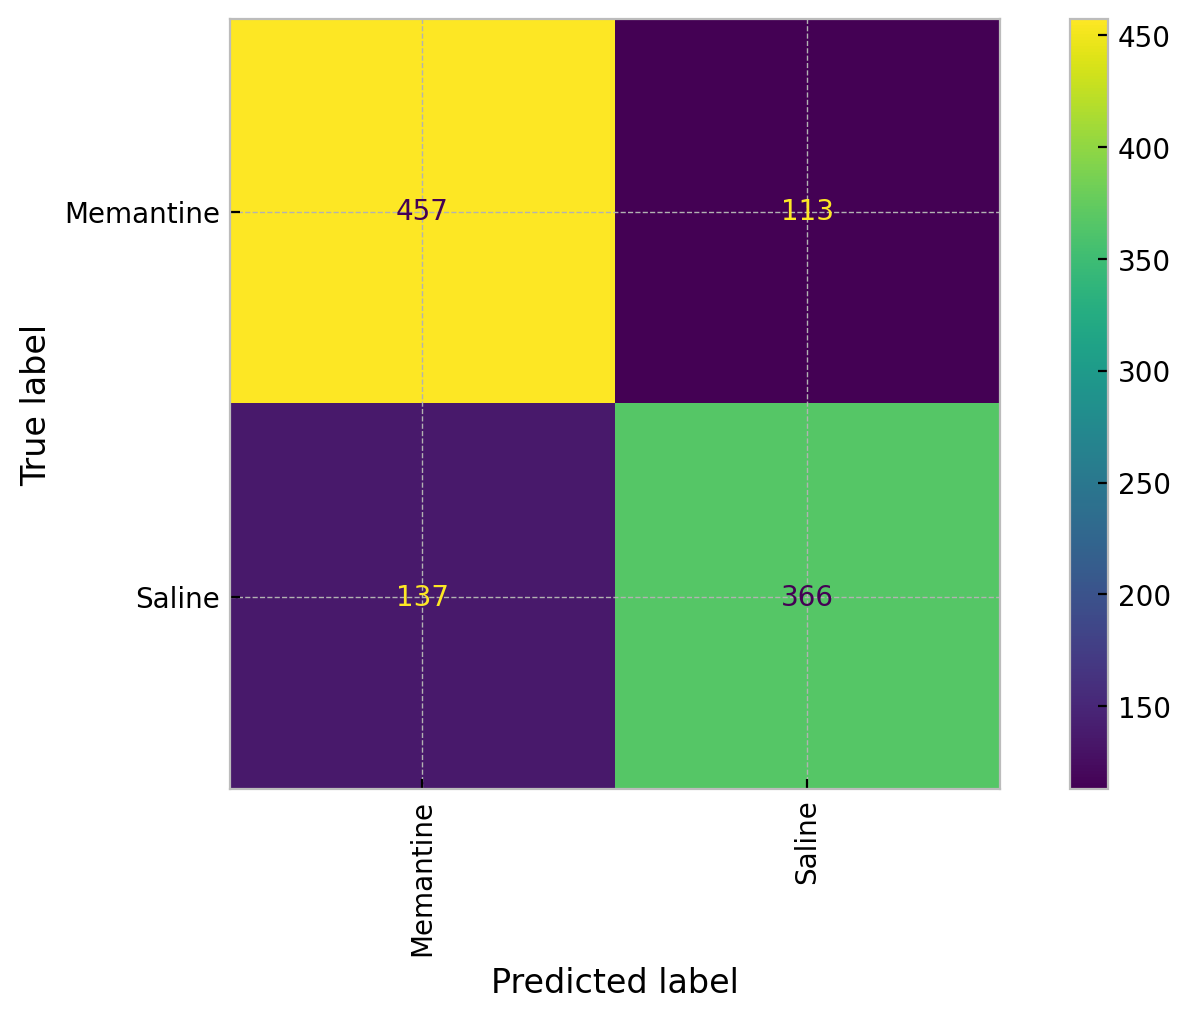

In [46]:
X, y = expr, treatment

model = LogisticRegression(max_iter=300)

show_confusion_matrix(model, 10, X, y)

Can you predict which of the eight classes a mouse belongs to based on protein expression?

In [47]:
X, y = expr, mouse_class

X.shape, y.shape, y.unique()

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
        't-CS-s', 't-SC-s'], dtype=object))

For now we'll just fit all of the data.

In [48]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

model.coef_.shape

(8, 69)

Each of the 8 sets of coefficients defines a logistic regression model for the binary classification of YES vs. NO for one of the 8 possible classes.

So really, we just fit 8 separate logistic regression models to 8 possible ways of splitting up the response output into binary classifications.

The final predicted class for a mouse is the class with the highest probability across the 8 models.

The final predicted class for a mouse is the class with the highest probability across the 8 models.

In [49]:
y_pred = model.predict(X)
y_proba = model.predict_proba(X)

In [50]:
result = pd.DataFrame(y_proba, columns=model.classes_)
result['Prediction'] = y_pred
result

,c-CS-m,c-CS-s,c-SC-m,c-SC-s,t-CS-m,t-CS-s,t-SC-m,t-SC-s,Prediction
0,0.464581,0.520201,6.621954e-09,0.002557,0.010674,0.001967,0.000006,0.000014,c-CS-s
1,0.587434,0.389493,1.872147e-08,0.003521,0.018146,0.001370,0.000009,0.000028,c-CS-m
2,0.523084,0.445027,1.468237e-08,0.002163,0.027570,0.002122,0.000005,0.000029,c-CS-m
3,0.378435,0.577024,9.860048e-08,0.004192,0.036747,0.003537,0.000006,0.000058,c-CS-s
4,0.373558,0.546111,1.806477e-07,0.004752,0.070831,0.004652,0.000006,0.000090,c-CS-s
...,...,...,...,...,...,...,...,...,...
1068,0.005639,0.000480,2.035590e-03,0.065441,0.015927,0.055154,0.003168,0.852155,t-SC-s
1069,0.011652,0.000908,1.400830e-03,0.132958,0.020826,0.043377,0.003428,0.785450,t-SC-s
1070,0.017394,0.001050,4.297465e-03,0.117792,0.045289,0.134537,0.002861,0.676779,t-SC-s
1071,0.015238,0.000617,2.780338e-03,0.101066,0.026105,0.076688,0.003768,0.773739,t-SC-s


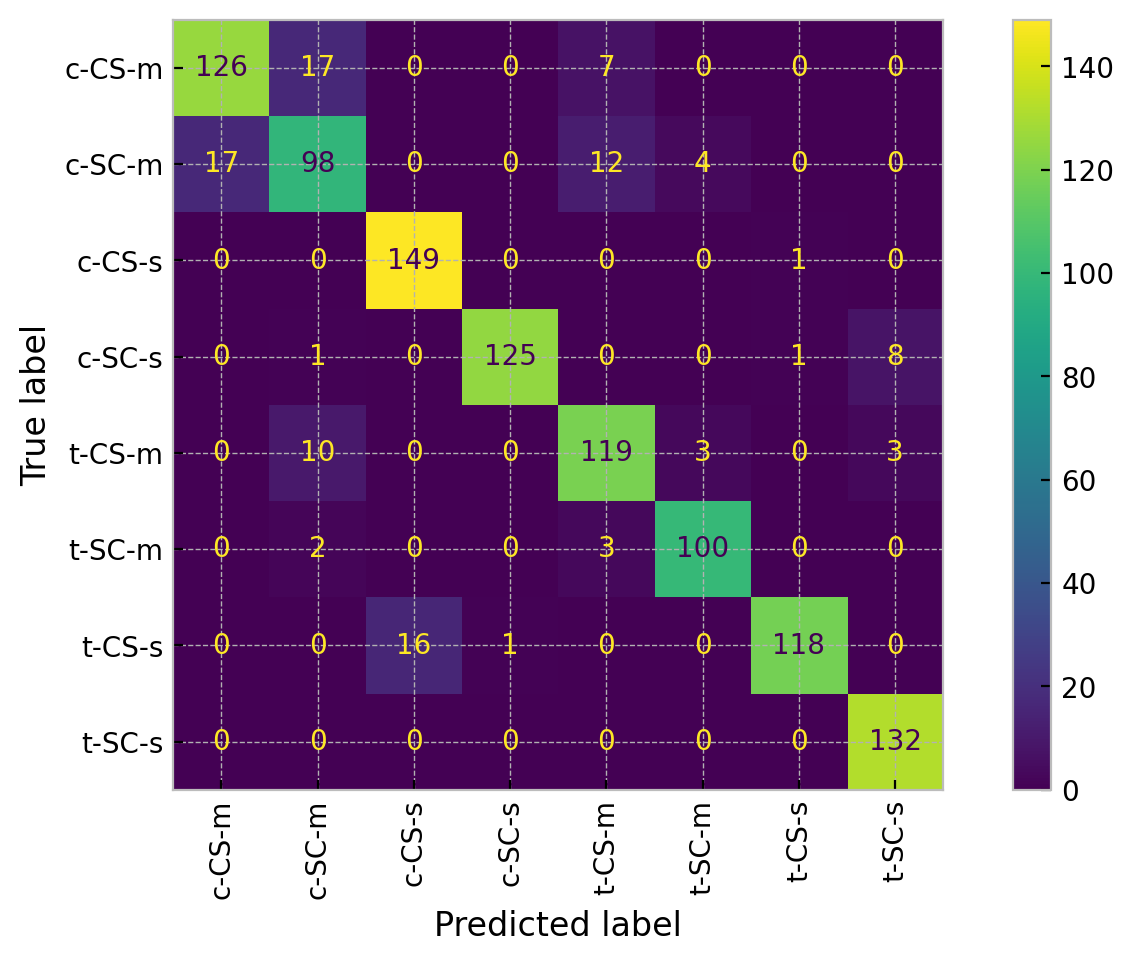

In [51]:
X, y = expr, mouse_class

model = LogisticRegression(max_iter=1000)

cmd = show_confusion_matrix(model, 10, X, y)

### Exercise

For a logistic regression classifier of mouse class (one of the 8 classes in the above dataset) based on its cortical nuclear protein expression level profile, use 10-fold cross validation to estimate a confusion matrix that shows the predicted accuracy of the model on mice in the future.

In [52]:
X, y = expr, mouse_class

X.shape, y.shape, y.unique()

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
        't-CS-s', 't-SC-s'], dtype=object))

In [ ]:
# # construct a logistic regression model object
# model = LogisticRegression(max_iter=1000)

# # use StratifiedKFold to define how to split training/validation sets
# # during cross validation
# kf = ...

# # get cross validated predictions for each data point
# y_pred = ...

# # print a confusion matrix
# cm = ...
# cm

### Exercise key

For a logistic regression classifier of mouse class (one of the 8 classes in the above dataset) based on its cortical nuclear protein expression level profile, use 10-fold cross validation to estimate a confusion matrix that shows the predicted accuracy of the model on mice in the future.

In [54]:
X, y = expr, mouse_class

X.shape, y.shape, y.unique()

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-SC-m', 'c-CS-s', 'c-SC-s', 't-CS-m', 't-SC-m',
        't-CS-s', 't-SC-s'], dtype=object))

In [55]:
# construct a logistic regression model object
model = LogisticRegression(max_iter=1000)

# use StratifiedKFold to define how to split training/validation sets
# during cross validation
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# get cross validated predictions for each data point
y_pred = cross_val_predict(model, X, y, cv=kf)

# print a confusion matrix
cm = confusion_matrix(y, y_pred)
cm

array([[126,  17,   0,   0,   7,   0,   0,   0],
       [ 17,  98,   0,   0,  12,   4,   0,   0],
       [  0,   0, 149,   0,   0,   0,   1,   0],
       [  0,   1,   0, 125,   0,   0,   1,   8],
       [  0,  10,   0,   0, 119,   3,   0,   3],
       [  0,   2,   0,   0,   3, 100,   0,   0],
       [  0,   0,  16,   1,   0,   0, 118,   0],
       [  0,   0,   0,   0,   0,   0,   0, 132]])

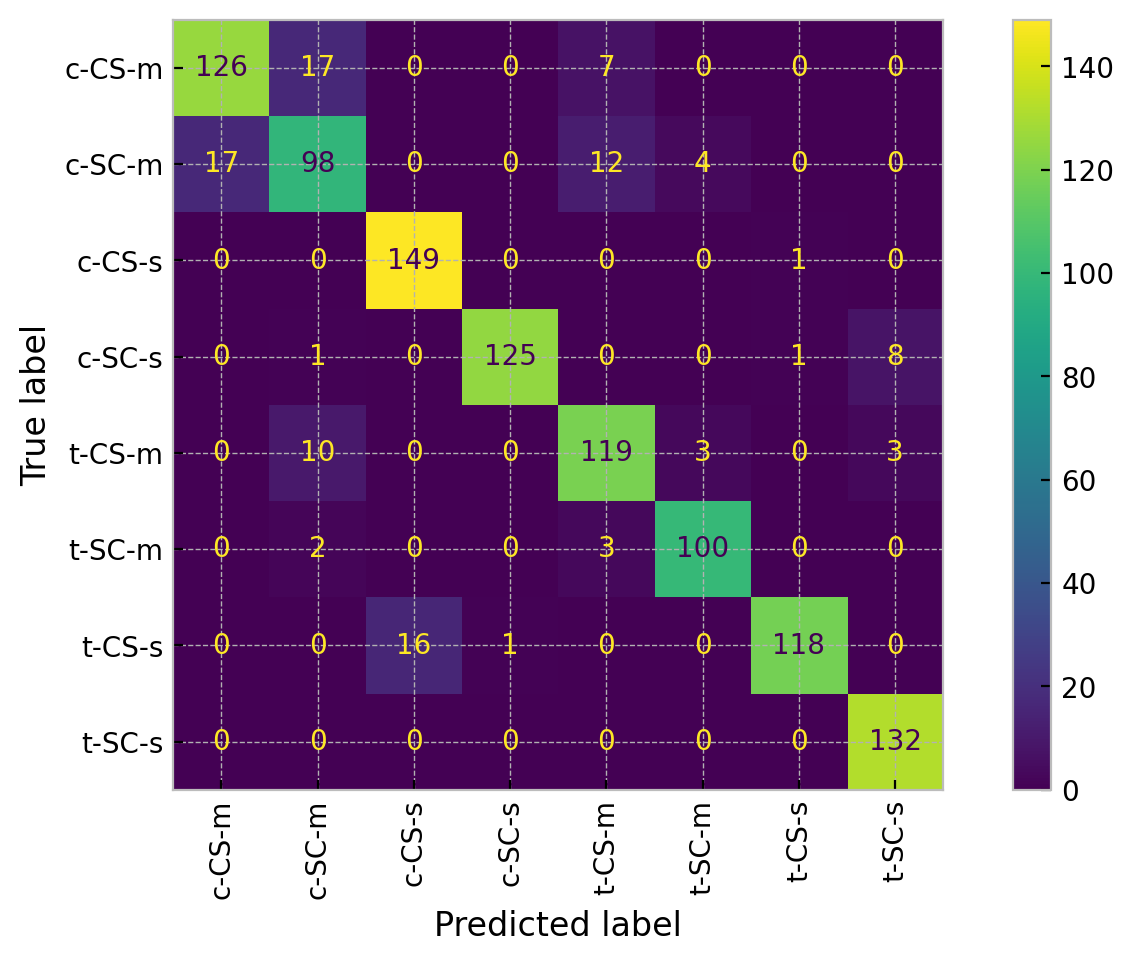

In [56]:
show_confusion_matrix(model, 10, X, y)

Our model's accuracy...

In [57]:
# same split as before...
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# cross validated accuracy...
accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
accuracy, np.mean(accuracy)

(array([0.91666667, 0.92592593, 0.91666667, 0.90654206, 0.87850467,
        0.93457944, 0.89719626, 0.88785047, 0.87850467, 0.86915888]),
 0.901159570785739)

Let's find an optimal regularization strength for our model.

In [58]:
from sklearn.model_selection import RandomizedSearchCV

# shuffled data
X, y = shuffle(expr, mouse_class, random_state=0)

# WARNING!!! This is VERY SLOW!
params = {'C': np.logspace(2, 4, 20)}
model = LogisticRegression(penalty='l2', C=1.0, max_iter=5000)
search = RandomizedSearchCV(model, params, cv=10, scoring='accuracy')
search.fit(X, y)

best_C = search.best_params_['C']
best_model = search.best_estimator_

best_model

LogisticRegression(C=2335.7214690901214, max_iter=5000)

This is a more accurate model than our prior logistic regression model with the default regularization.

In [59]:
# same split as before...
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# cross validated accuracy...
accuracy = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')
np.mean(accuracy)

0.9906715126341294

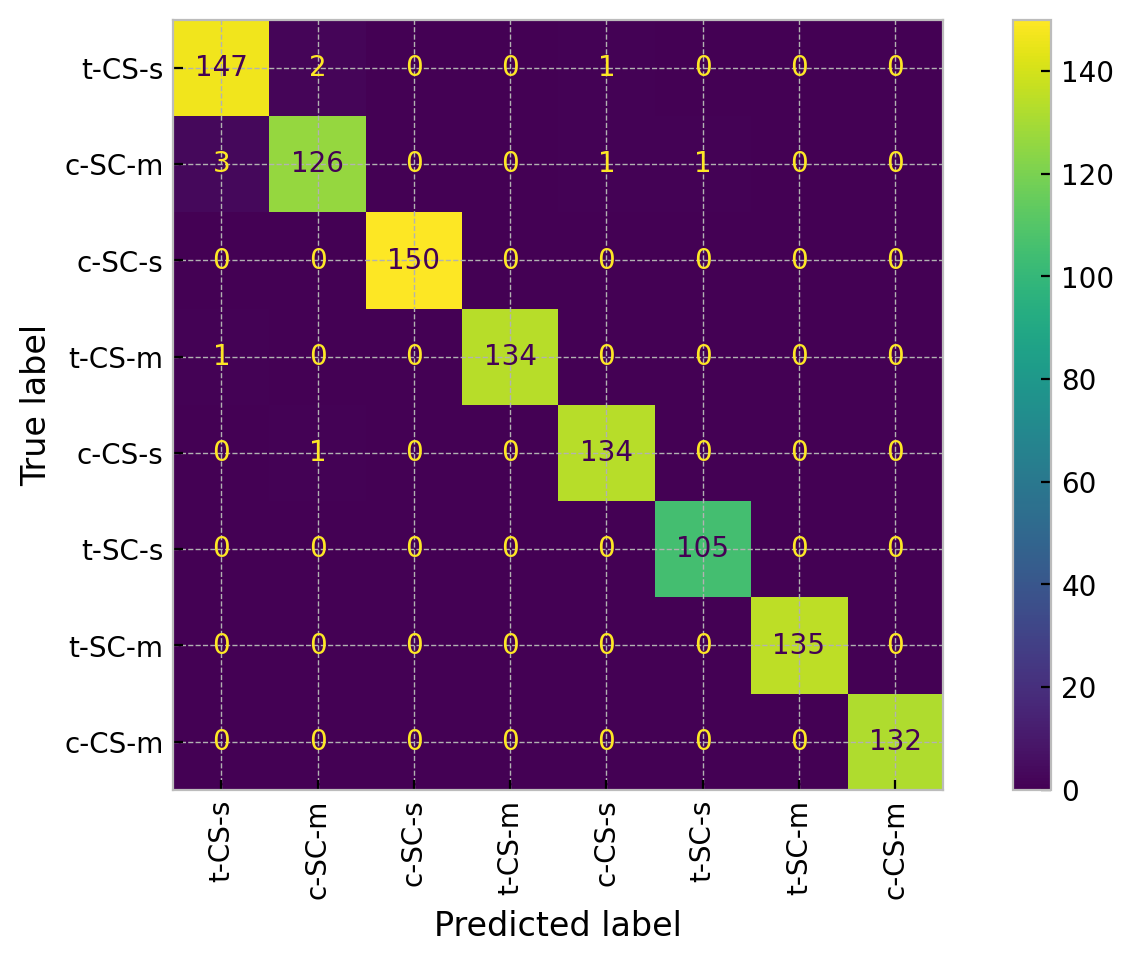

In [60]:
show_confusion_matrix(best_model, 10, X, y)